# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Wissal Belhorma

## Imports

Please do **not** import any other library.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from scipy.stats import norm, chi2, gaussian_kde

In [57]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [75]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [76]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [77]:
regions = list(df.region.unique())

In [78]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [79]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [80]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [81]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

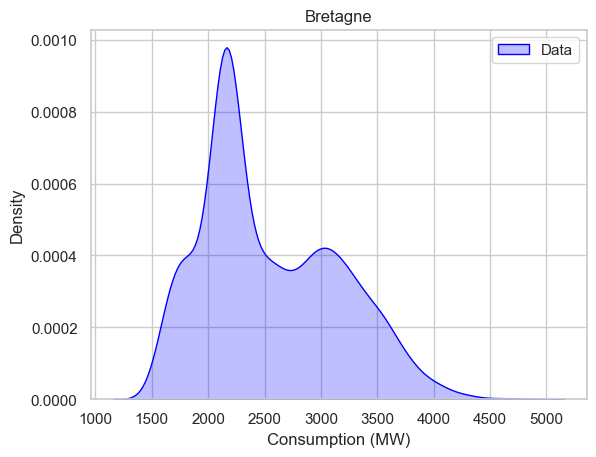

In [82]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:       Let $$ \mu = \mathbb{E}[x_1] $$  $x_1,\ldots,x_n$  are iid  so
 $$ \mathbb{E}[\hat \mu]=\mathbb{E}[\frac 1 n \sum_{i=1}^n x_i] = \frac 1 n \sum_{i=1}^n \mathbb{E}[x_i] = \frac n n \mathbb{E}[x_1]=\mu$$

 for the variance we have :
 Let $\sigma^2=\text{var}(X_1)$
$$\mathbb{E}[\hat \sigma^2]=\frac{1}{n-1}\sum_{i=1}^{n}\mathbb{E}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j)^2)$$
We have  $$  X_i-\frac{1}{n}\sum_{j=1}^{n}X_j $$ is centered so
 $$ \mathbb{E}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j))=0 $$
so $ \mathbb{E}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j)^2)=\text{Var}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j))$
so :


$ \text{Var}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j))=\text{var}(X_i-\frac{1}{n}X_i -\frac{1}{n}\sum_{\substack{j=1 \\ j \neq i}}^{n}X_j)$
$=\text{var}((1-\frac{1}{n})X_i)+ \frac{1}{n^2}\sum_{\substack{j=1 \\ j \neq i}}^{n}\text{var}(X_j)$
$=(\frac{n-1}{n})^2 \sigma^2 +\frac{1}{n^2}(n-1)\sigma^2 $
$=\frac{n-1}{n}\sigma^2$



we conclude that
$$\mathbb{E}[\hat \sigma^2]=\sigma^2$$




so the estimators for the mean and the variance are unbiased



2. Give the values obtained for the mean and the standard deviation using these estimators.

In [83]:
consumption=np.array(df[df["region"] == "Bretagne"]["consumption"])


average = np.sum(consumption) / len(consumption)  
print("The average using estimators is:", average)

std = np.sqrt((1 / (len(consumption) - 1)) * np.sum((consumption - average) ** 2)) 
print("The standard deviation using estimator is:", std)


bretagne_consumption = df[df["region"] == "Bretagne"]["consumption"].mean()
print("The average :",bretagne_consumption)




standard_deviation = df[df["region"] == "Bretagne"]["consumption"].std()

print("Standard Deviation:", standard_deviation)




The average using estimators is: 2546.536155666579
The standard deviation using estimator is: 604.9429842099315
The average : 2546.536155666579
Standard Deviation: 604.9429842099315


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [84]:
mu = 2546.536155666579  
sigma = 604.9429842099315  

num_samples = len(df[df["region"] == "Bretagne"]["consumption"])
print(num_samples)
new_data = np.random.normal(mu, sigma, num_samples)

3803


4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

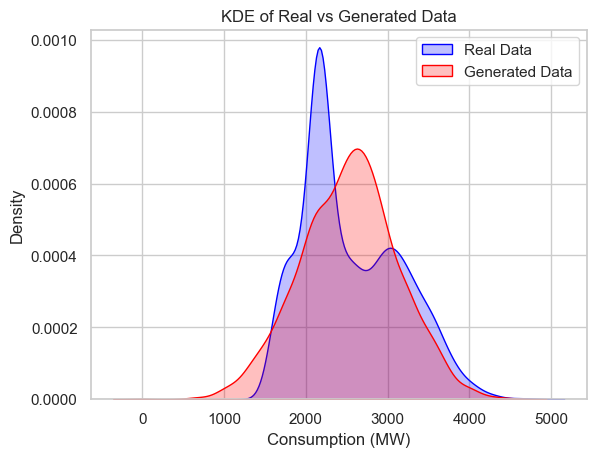

In [85]:
sns.kdeplot(data=df_region, x="consumption", label="Real Data", color='blue', fill=True)

# KDE of generated data
sns.kdeplot(new_data, label="Generated Data", color='red', fill=True)

plt.title("KDE of Real vs Generated Data")
plt.xlabel("Consumption (MW)")
plt.legend()

# Display the plot
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

Mean Consumption for Bretagne: 3214.1782077393077
Estimated Standard Deviation for Bretagne: 409.4763740819989
982


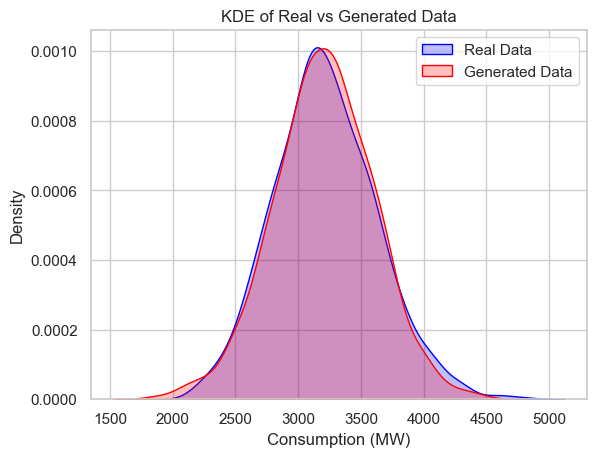

In [86]:
filename = 'power_consumption.csv'
df = pd.read_csv(filename)


df['date'] = pd.to_datetime(df['date'])
combined_winter_df = pd.DataFrame()
# Define the date range for the year 2013
start_date_2013 = pd.to_datetime("2013-01-01")
end_date_2013 = pd.to_datetime("2013-03-21")

# Filter the DataFrame to select only days in the date range for 2013 winter of 2013 is specific
winter_df_2013 = df[(df['date'] >= start_date_2013) & (df['date'] <= end_date_2013)]
#print(winter_df_2013)


combined_winter_df = pd.concat([combined_winter_df, winter_df_2013])

# Loop through each year in the period from 2013 to 2023
years = range(2013, 2024)  
for year in years:
    # Define the winter date range for the current year
    start_date = pd.to_datetime(f"{year}-12-22")
    end_date = pd.to_datetime(f"{year + 1}-03-21")

    # Filter the DataFrame to select only winter days for the current year
    winter_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    combined_winter_df = pd.concat([combined_winter_df, winter_df])    
    

    
   
regions = list(combined_winter_df['region'].unique()) 
# selection of a region
region = "Bretagne"   
df_region_combined = combined_winter_df[combined_winter_df['region'] == region]
bretagne_mean_consumption = df_region_combined["consumption"].mean()
print("Mean Consumption for Bretagne:", bretagne_mean_consumption)

# Calculate the standard deviation for the "Bretagne" region
xi_values = df_region_combined["consumption"]
standard_deviation = xi_values.std()
print("Estimated Standard Deviation for Bretagne:", standard_deviation) 
num_samples_breta = len(xi_values)
print(num_samples_breta)
new_data = np.random.normal(bretagne_mean_consumption, standard_deviation, num_samples_breta)
sns.kdeplot(data=df_region_combined, x="consumption", label="Real Data", color='blue', fill=True)

# KDE of generated data
sns.kdeplot(new_data, label="Generated Data", color='red', fill=True)

plt.title("KDE of Real vs Generated Data")
plt.xlabel("Consumption (MW)")
plt.legend()

# Display the plot
plt.show()







6. In which case the Gaussian model seems more appropriate?

 in the second case the gaussian model seems more appropriate

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser: we have d(f, g) > 0 , and
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx \leq \frac 1 2 \int |f(x)| \mathrm dx  + \frac 1 2 \int |g(x)| \mathrm dx = 1  $$ 
 because f and g are densities so positive and with integral equal to 1 

 2- $$ d(f, g) = 0 \ if\ and \ only \ if \ \lVert f(x) - g(x) \rVert_1 = 0 $$ if and only if  $ f=g $ almost everywhere 


3-  suppose that $ d(f, g) = 1 $

  
  
   let  P  and Q be two probabilities such that $$ \frac{dP}{d\lambda} = f  \ and \ \frac{dQ}{d\lambda} = g  $$ because P and Q have densities with respect to the lebesgue measure  . Let A be the set A = \{f < g\}
 $$ 2d(f, g) = \int_A |f(x) - g(x)| \mathrm dx +\int_{A^c} |f(x) - g(x)| \mathrm dx = - \int_A f(x) \mathrm dx + \int_A g(x) + \int_{A^c} f(x) -  \int_{A^c} g(x) = Q(A) - Q({A^c}) - P(A) + P({A^c}) = 2(Q(A)-P(A)) $$

 so we find 


 $d(f,g)=(Q(A)-P(A))=1$   so
 
 
  $ Q(A)=1 \ and \ P(A)=0 $ or $ Q(A)=0 \ and \ P(A)=1 $ 
  
  
  since the problem is symmetrical let suppose $ Q(A)=1 \ and \ P(A)=0 $   
  
  so $ \text{Supp}(g) \subset A$  and since $  P(A)=0 $ so $ \text{Supp}(f) $ and A are disjoint so f and g have disjoint supports 


The reverse implication  if f and g have disjoint supports then  $d(f,g) = 1 $
 


2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

0.18743098178007472


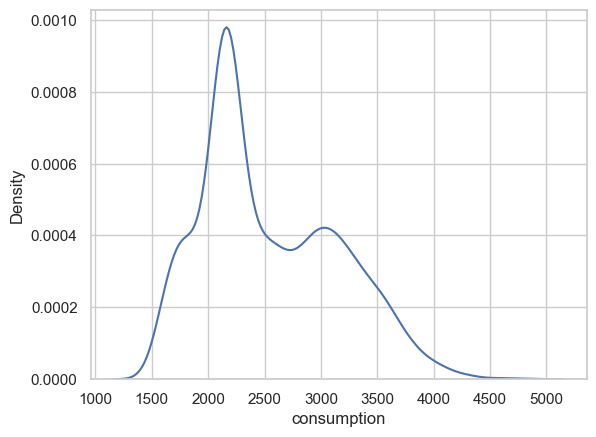

In [88]:

data_kde_X, data_kde_Y = sns.kdeplot(data=df_region["consumption"]).get_lines()[0].get_data()
region = "Bretagne"
df_region = df[df.region == region]
data = df_region["consumption"]
mu = 2546.536155666579  
sigma = 604.9429842099315  
# Estimate the density function using Gaussian KDE
kde = gaussian_kde(data)
new_data = np.random.normal(mu, sigma, 3803)
kde2 = gaussian_kde(new_data)
# Define the x values for which we compute the integral
x = np.linspace(min(data.min(), new_data.min()), max(data.max(), new_data.max()), 1000)

# Evaluate the first KDE at specific points
pdf_values_data = kde(x)


# Evaluate the second KDE at the same points
pdf_values_new_data = kde2(x)

# Calculate the absolute difference between the two KDEs
abs_diff = np.abs(pdf_values_data - pdf_values_new_data)

# Compute the integral of the absolute difference using the trapezoidal rule
integral = np.trapz(abs_diff, x)
print(integral/2)








3. Do the same for the region Bretagne in winter and check your conclusion of part A.

0.026110238335811588


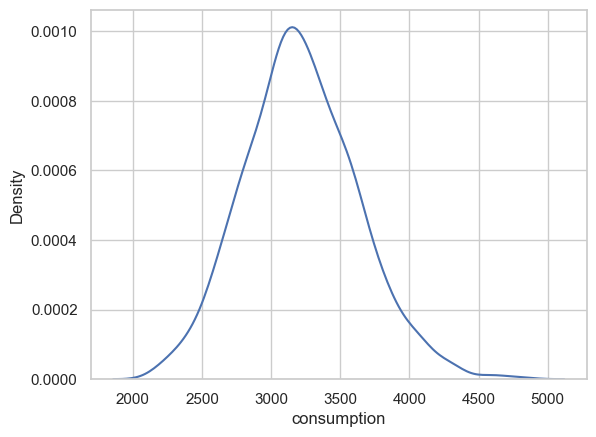

In [91]:

def compute_dissimilarity(dat,expec,sig,number):
    
    # Estimate the density function using Gaussian KDE
    kde4 = gaussian_kde(dat)
    new_dat = np.random.normal(expec, sig,number)
    kde5 = gaussian_kde(new_dat)
    # Define the x values for which you want to compute the integral
    x1 = np.linspace(min(dat.min(), new_dat.min()), max(dat.max(), new_dat.max()), 1000)
    pdf_values_dat = kde4(x1)
    pdf_values_new_dat = kde5(x1)
# Calculate the absolute difference between the two KDEs
    abs_dif = np.abs(pdf_values_dat - pdf_values_new_dat)
    integra = np.trapz(abs_dif, x1)
    return integra/2
region = "Bretagne"
df_region = df[df.region == region]
df_region_combined = combined_winter_df[combined_winter_df['region'] == region]
data_kde_X1, data_kde_Y2 = sns.kdeplot(data=df_region_combined["consumption"]).get_lines()[0].get_data()
dat = df_region_combined["consumption"] 
    # Estimate the density function using Gaussian KDE
print(compute_dissimilarity(dat,bretagne_mean_consumption,standard_deviation,982))    



4. Do the same for all regions. Give the result as a single dataframe.

/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_912/3977333098.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  finalresults_df = pd.concat([finalresults_df, finalregion_result], ignore_index=True)


                        Region  Dissimilarity  WDissimilarity
0         Auvergne-Rhône-Alpes       0.170338        0.025489
1      Bourgogne-Franche-Comté       0.124085        0.050370
2                     Bretagne       0.180984        0.051020
3          Centre-Val de Loire       0.193605        0.029338
4                    Grand Est       0.107068        0.050233
5              Hauts-de-France       0.140594        0.038108
6                    Normandie       0.166849        0.029256
7           Nouvelle-Aquitaine       0.208629        0.058556
8                    Occitanie       0.216183        0.075665
9             Pays de la Loire       0.165845        0.048549
10  Provence-Alpes-Côte d'Azur       0.220745        0.033084
11               Île-de-France       0.170782        0.044597


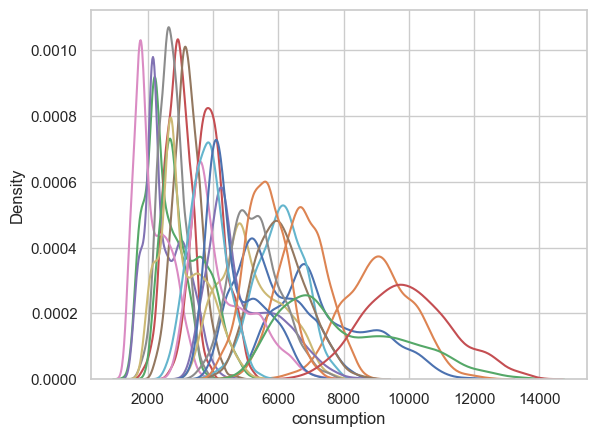

In [97]:

regions = df["region"].unique()
finalresults_df = pd.DataFrame(columns=["Region", "Dissimilarity","WDissimilarity"])

for region in regions:
    
    df_region = df[df["region"] == region]
    data_region = df_region["consumption"]
    number=len(data_region)  
    df_region_combined = combined_winter_df[combined_winter_df['region'] == region]
    data_region_combined=df_region_combined["consumption"]
    number3=len(data_region_combined)
    Wmean_consumption = df_region_combined["consumption"].mean()
    mu_region = df_region["consumption"].mean()
    sigma_region = df_region["consumption"].std()
    Wstandard_deviation=df_region_combined["consumption"].std()
    data_kde_X, data_kde_Y = sns.kdeplot(data=df_region["consumption"]).get_lines()[0].get_data()
    Wdata_kde_X, Wdata_kde_Y = sns.kdeplot(data=df_region_combined["consumption"]).get_lines()[0].get_data()
    dissimilarity=compute_dissimilarity(data_region,mu_region,sigma_region,number)
    Wdissimilarity=compute_dissimilarity(data_region_combined,Wmean_consumption,Wstandard_deviation,number3)
    finalregion_result = pd.DataFrame({"Region": [region], "Dissimilarity": [dissimilarity],"WDissimilarity": [Wdissimilarity]})
    finalresults_df = pd.concat([finalresults_df, finalregion_result], ignore_index=True)
print(finalresults_df)

5. Which region is best fitted by a Gaussian model in winter?

due to the random effect of generating data we getv different results of dissimilarities but by running code several times , we get that Auvergne-Rhône-Alpes is the one that has a high probability to be the best filterd by a Gaussian model in winter

6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

Mean Consumption : 9066.37881873727
Estimated Standard Deviation for : 1061.5062351860531
982


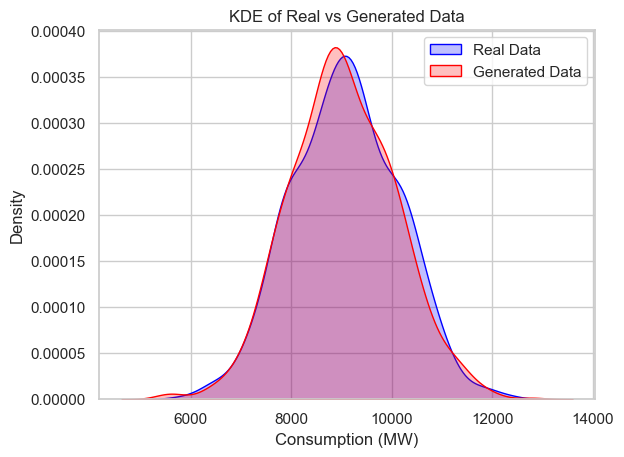

In [96]:
  
df_region_combined_re = combined_winter_df[combined_winter_df['region'] == "Auvergne-Rhône-Alpes"]
h_mean_consumption = df_region_combined_re["consumption"].mean()
print("Mean Consumption :", h_mean_consumption)

# Calculate the standard deviation for the "Bretagne" region
xi_values_re = df_region_combined_re["consumption"]
standard_deviation_re = xi_values_re.std()
print("Estimated Standard Deviation for :", standard_deviation_re) 
num_samples_re = len(xi_values_re)
print(num_samples_re)
new_data_re = np.random.normal(h_mean_consumption, standard_deviation_re, num_samples_re)
sns.kdeplot(data=df_region_combined_re, x="consumption", label="Real Data", color='blue', fill=True)

# KDE of generated data
sns.kdeplot(new_data_re, label="Generated Data", color='red', fill=True)

plt.title("KDE of Real vs Generated Data")
plt.xlabel("Consumption (MW)")
plt.legend()

# Display the plot
plt.show()

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer: $$ 
\pi(\mu | x) \propto \pi(\mu) p(x | \mu) \propto \frac{1}{\sigma_0 \sqrt{2\pi}} e^{-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}} \cdot \frac{1}{(\sigma \sqrt{2\pi})^{n}} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2} $$

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

The posterior has a gaussian distribution with mean equals to $ \frac{\frac{\mu_0}{\sigma_0^2}+\frac{s}{\sigma^2}}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}}$
and variance equals to  : $\frac{1}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}}$

In [98]:
combined_winter_df

combined_winter_df['date'] = pd.to_datetime(combined_winter_df['date'])
combined_winter_df['year'] = combined_winter_df['date'].dt.year
years = list(range(2013, 2024))
moyennes_conso = []
sigma=400
mu_0=3500
sigma_0=500
means=[]
variances=[]
for year in years:
    moyenne = combined_winter_df[combined_winter_df["region"]== "Bretagne"][combined_winter_df['year'] == year]['consumption'].mean().astype(int)
    n=len(combined_winter_df[combined_winter_df["region"]== "Bretagne"][combined_winter_df['year'] == year]['consumption'])
    s=moyenne*n
    posterior_mean=((mu_0/sigma_0**2) +(s/sigma**2))/((1/sigma_0**2) +(n/sigma**2))
    posterior_variance=1/((1/sigma_0**2)+(n/sigma**2))
    means.append(posterior_mean)
    variances.append(posterior_variance)
    moyennes_conso.append(moyenne)
    
nouveau_df = pd.DataFrame({'year': years, 'MoyenneConsommation': moyennes_conso , 'poterior_mean':means ,'poterior_variance':variances})




print(nouveau_df)




    year  MoyenneConsommation  poterior_mean  poterior_variance
0   2013                 3342    3343.115622        1765.225066
1   2014                 3115    3117.718447        1765.225066
2   2015                 3165    3167.365402        1765.225066
3   2016                 3205    3207.060236        1745.962462
4   2017                 3249    3250.772286        1765.225066
5   2018                 3313    3314.320388        1765.225066
6   2019                 3193    3195.167696        1765.225066
7   2020                 3143    3145.493234        1745.962462
8   2021                 3340    3341.129744        1765.225066
9   2022                 3162    3164.386584        1765.225066
10  2023                 3114    3117.063492        1984.126984


/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_912/855141101.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne = combined_winter_df[combined_winter_df["region"]== "Bretagne"][combined_winter_df['year'] == year]['consumption'].mean().astype(int)
/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_912/855141101.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n=len(combined_winter_df[combined_winter_df["region"]== "Bretagne"][combined_winter_df['year'] == year]['consumption'])
/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_912/855141101.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne = combined_winter_df[combined_winter_df["region"]== "Bretagne"][combined_winter_df['year'] == year]['consumption'].mean().astype(int)
/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_912/855141101.py:14: UserWarning: Boolean Series key will be re

3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_912/586247424.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region_combined2023 = combined_winter_df[combined_winter_df['region'] == region][combined_winter_df['year'] == 2023]


Mean Consumption for Bretagne: 3114.4875
Estimated Standard Deviation for Bretagne: 421.19588616855754
80


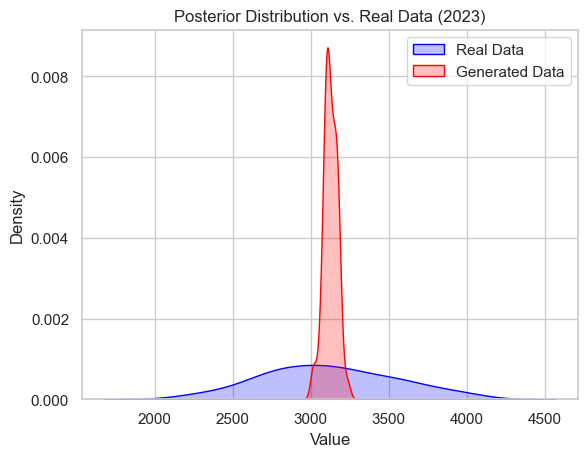

In [100]:

region = "Bretagne" 
df_region_combined2023 = combined_winter_df[combined_winter_df['region'] == region][combined_winter_df['year'] == 2023]
bretagne_mean_consumption2023 = df_region_combined2023["consumption"].mean()
print("Mean Consumption for Bretagne:", bretagne_mean_consumption2023)

# Calculate the standard deviation for the "Bretagne" region
xi_values2023 = df_region_combined2023["consumption"]
standard_deviation2023 = xi_values2023.std()
print("Estimated Standard Deviation for Bretagne:", standard_deviation2023) 
num_samples2023 = len(xi_values2023)
print(num_samples2023)
new_data2023 = np.random.normal(3117.063492, np.sqrt(1984.126984), num_samples2023)
sns.kdeplot(data=df_region_combined2023, x="consumption", label="Real Data", color='blue', fill=True)
sns.kdeplot(new_data2023, label="Generated Data", color='red', fill=True)

# Add labels and legend
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Posterior Distribution vs. Real Data (2023)")
plt.legend()

# Show the plot
plt.show()


4. Discuss the results, comparing to those obtained in part A.

Your answer:

In classification, posterior probabilities reflect the uncertainty of assessing an observation to particular class , The posterior distribution of θ (after observations) gives more information about distribution that's why it's sharp, and variance is so small .

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

we're in the case of a simple hypothesis $$
\frac{p_1(x)}{p_0(x)} \ \propto \ \frac{ e^{-\frac{1}{2\sigma_1^2} \sum_{i=1}^n (x_i - \mu_1)^2}}{e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu_1)^2}} \propto \ $$
And we have  here $ \sigma \leq \sigma_1 $ a uniformly most powerful test is given by : $ \delta(x )= \mathbb{1}_{S \geq c}  $ 
for some constant $ c\geq 0 \,\ S \sim \sqrt (\sigma^2) Y $ such that $ Y \sim \chi^2(n)$
Hence $$ \alpha = P_0(S \gt c) = P_0(\sqrt (\sigma^2) Y \gt c)= P_0(Y \gt \frac{c}{\sqrt (\sigma^2)}) $$

$$ \frac{c}{ \sigma_1^2}= Q(1-\alpha)$$

 such that Q is  the quantile fonction of the $\chi^2(n)$  distribution
Then $ c=Q(1-\alpha)\ \sigma_1^2 $


Your answer:

2. Provide the result of this test for $\alpha=1\%$.

In [102]:
from scipy.stats import chi2
region = "Bretagne"
df_region_combined2023 = combined_winter_df[combined_winter_df['region'] == region][combined_winter_df['year'] == 2023]
xi_values2023 = df_region_combined2023["consumption"]
noi = len(xi_values2023)
print(noi)
s = 0
for el in xi_values2023 :
    s+=  ( el - 3200 )**2
print(s)
quantile = chi2.ppf(0.99, noi)
sigma1=400
c=(sigma1**2)*quantile
print(c)    
    
    



80
14600063
17972606.803247597


/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_912/1748893126.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region_combined2023 = combined_winter_df[combined_winter_df['region'] == region][combined_winter_df['year'] == 2023]


so we accept the null hypothesis and we reject the new one

## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

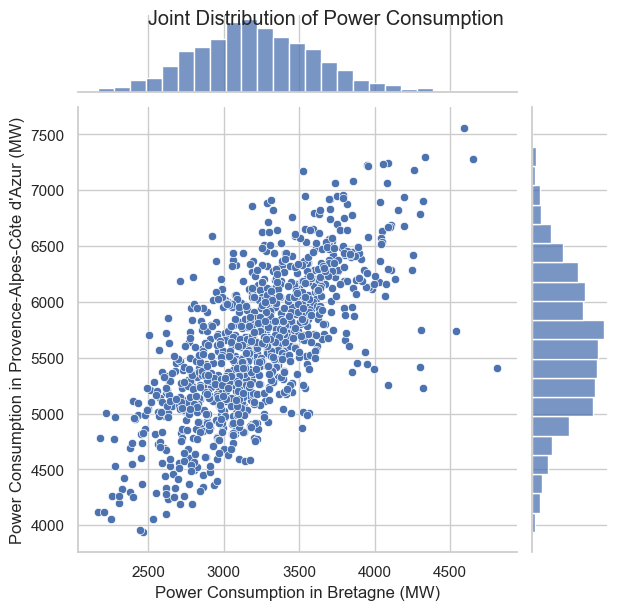

In [36]:
bretagne_data = combined_winter_df[combined_winter_df['region'] == "Bretagne"]
provence_data = combined_winter_df[combined_winter_df['region'] == "Provence-Alpes-Côte d'Azur"]


# Create a joint plot for the joint distribution of power consumption in these regions
sns.set(style="whitegrid")  # Optional: Set the style
g = sns.jointplot( x=np.array(bretagne_data["consumption"]), y=np.array(provence_data["consumption"]), kind="scatter")

# Set labels and title
g.ax_joint.set_xlabel("Power Consumption in Bretagne (MW)")
g.ax_joint.set_ylabel("Power Consumption in Provence-Alpes-Côte d'Azur (MW)")
g.fig.suptitle("Joint Distribution of Power Consumption")

# Show the plot
plt.show()

2. Do you think the power consumption in these two regions is independent?

Your answer:  looking at the plot we see that the power consumption in the two regions are dependent because the points are not scattered over the entire plot , they're are heavily distributed around axes x=y , we can deduce a cetain dependence of the two variables

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:  We define first $ A_1,....,A_K $ and $ B_1,....,B_L$ two partitions of the value space
Let $ N_i = \sum_{l=1}^{n}\mathbb{1}_{X_l \in A_i } $ and $ N_j = \sum_{h=1}^{n}\mathbb{1}_{Y_h \in B_j }$ and
 $ N_{i,j}=\sum_{t=1}^{n}\mathbb{1}_{X_t \in A_i \,\ Y_t \in B_j }$
$$ \delta(x,y) = \mathbb{1}_{T(x,y) \geq c}  \ \forall c $$ 
such that $$ T(x,y)=\sum_{i,j} \frac{(N_{i,j}-\frac{N_iN_j}{n})^2}{\frac{N_iN_j}{n}}$$ and 
so the ndependence is rejected whenever $ T (x, y) \gt c $

4. Give the result of this test for $\alpha=1\%$. 

In [106]:
def partition(region,d):#This function creates a partition of region consumptions with a chosen size 'd'
     partition=[]
     g= df[df.region == region]
     p=g["consumption"]
     l=np.array(p)
     min=np.min(l)
     max=np.max(l)
     pas=(max-min)/d
     for i in range (d+1):
          partition=partition+[min+i*pas]
     return partition


def T (region1,region2,d1,d2):#this function returns the 'T' of the independence test between region 1 and region 2, for partitions chosen by 'd1' and 'd2
     T=0
     N1=[]
     N2=[]
     N12=[]
     x = df[df.region == region1]
     y = df[df.region == region2]
     a=np.array(x["consumption"])
     b=np.array(y["consumption"])
     part1=partition(region1,d1)
     part2=partition(region2,d2)

     for i in range(d1):
          N1=N1+[sum(1 for t in range(len(a)) if part1[i]<a[t]<part2[i+1] )]
          
     for i in range(d2):
          N2=N2+[sum(1 for t in range(len(b)) if part2[i]<b[t]<part2[i+1] )]  

     for i in range(d1):
          for j in range(d2):
               N12=N12+[sum([1 for t in range(len(a)) if part2[i]<b[t]<part2[i+1] and part1[i]<a[t]<part1[i+1]])]

     for i in range(d1):
          for j in range(d2):
               T+=(N12[d2*i+j]-N1[i]*N2[j]/len(a))**2/N1[i]*N2[j]/len(a)

     
     return T

print(partition("Bretagne",10))
print(T("Bretagne","Provence-Alpes-Côte d'Azur",5,5))

quantile2 = chi2.ppf(0.99, 16)
print(quantile2)


[1507.0, 1837.2, 2167.4, 2497.6, 2827.8, 3158.0, 3488.2, 3818.4, 4148.6, 4478.799999999999, 4809.0]
218.9554940789849
31.999926908815176


so we reject the null hypothesis , we have the power consumption in the two regions are dependent 

## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

Let $ \overline{X}$ be the empirical mean ,and V the empirical variance, Let Q be the quantile
function of $ T \sim \text{St}(n-1)$
The average daily consumption is $\overline{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$  we have $\frac{\overline{X}-\mu}{\sqrt(\frac{V}{n-1})} \sim \text{St}(n-1)\ $

 So We obtain the confidence interval ($ \overline{X}-\sqrt(\frac{V}{n-1})Q(1-\frac{\alpha}{2})$ ,  $ \overline{X}+\sqrt(\frac{V}{n-1})Q(1-\frac{\alpha}{2})$ )  so we obtain 

In [107]:
import scipy.stats as stats

regions = list(combined_winter_df['region'].unique()) 

# selection of a region

region = "Bretagne"   
df_region_combined = combined_winter_df[combined_winter_df['region'] == region]
bretagne_mean_consumption = df_region_combined["consumption"].mean()
print("Mean Consumption for Bretagne:", bretagne_mean_consumption)


# Calculate the standard deviation for the "Bretagne" region
xi_values = df_region_combined["consumption"]
num_samples = len(xi_values)
standard_deviation = xi_values.std()
print("Estimated Standard Deviation for Bretagne:", standard_deviation) 
num=num_samples-1
quantile = stats.t.ppf(0.975, df=num)
l=bretagne_mean_consumption- np.sqrt((standard_deviation**2)/num)*quantile
j=bretagne_mean_consumption+ np.sqrt((standard_deviation**2)/num)*quantile
print("symmetric confidence interval :","[",l,",",j,"]")


Mean Consumption for Bretagne: 3214.1782077393077
Estimated Standard Deviation for Bretagne: 409.4763740819989
symmetric confidence interval : [ 3188.5228194940933 , 3239.833595984522 ]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

We compute using the same method as above the confidence interval we find  confidence interval for 2023 : [ 3020.1635686470154 , 3208.811431352985 ]

Since 3100 is in the confidence interval we accept the null hypothesis that the mean in 2023 is equal to 3100

In [ ]:
import scipy.stats as stats
region = "Bretagne"
df_region_combined2023 = combined_winter_df[combined_winter_df['region'] == region][combined_winter_df['year'] == 2023]
xi_values2023 = df_region_combined2023["consumption"]
bretagne_mean_consumption2023 = df_region_combined2023["consumption"].mean()
print("Mean Consumption for Bretagne 2023:", bretagne_mean_consumption2023)
standard_deviation2023 = xi_values2023.std()
print("Estimated Standard Deviation for Bretagne 2023:", standard_deviation2023) 
num_samples2023 = len(xi_values2023)
kj=num_samples2023-1
quantile2 = stats.t.ppf(0.975, df=kj)
lo=bretagne_mean_consumption2023- np.sqrt((standard_deviation2023**2)/kj)*quantile2
jo=bretagne_mean_consumption2023+ np.sqrt((standard_deviation2023**2)/kj)*quantile2
print(" confidence interval for 2023 :","[",lo,",",jo,"]")

Mean Consumption for Bretagne 2023: 3114.4875
Estimated Standard Deviation for Bretagne 2023: 421.19588616855754
 confidence interval for 2023 : [ 3020.1635686470154 , 3208.811431352985 ]


/var/folders/yv/5d6fkrhn3cl2yf612g4gl1dr0000gn/T/ipykernel_1142/3786892912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region_combined2023 = combined_winter_df[combined_winter_df['region'] == region][combined_winter_df['year'] == 2023]
